## "Linear Regression is a useful tool for predicting a quantitative response.",

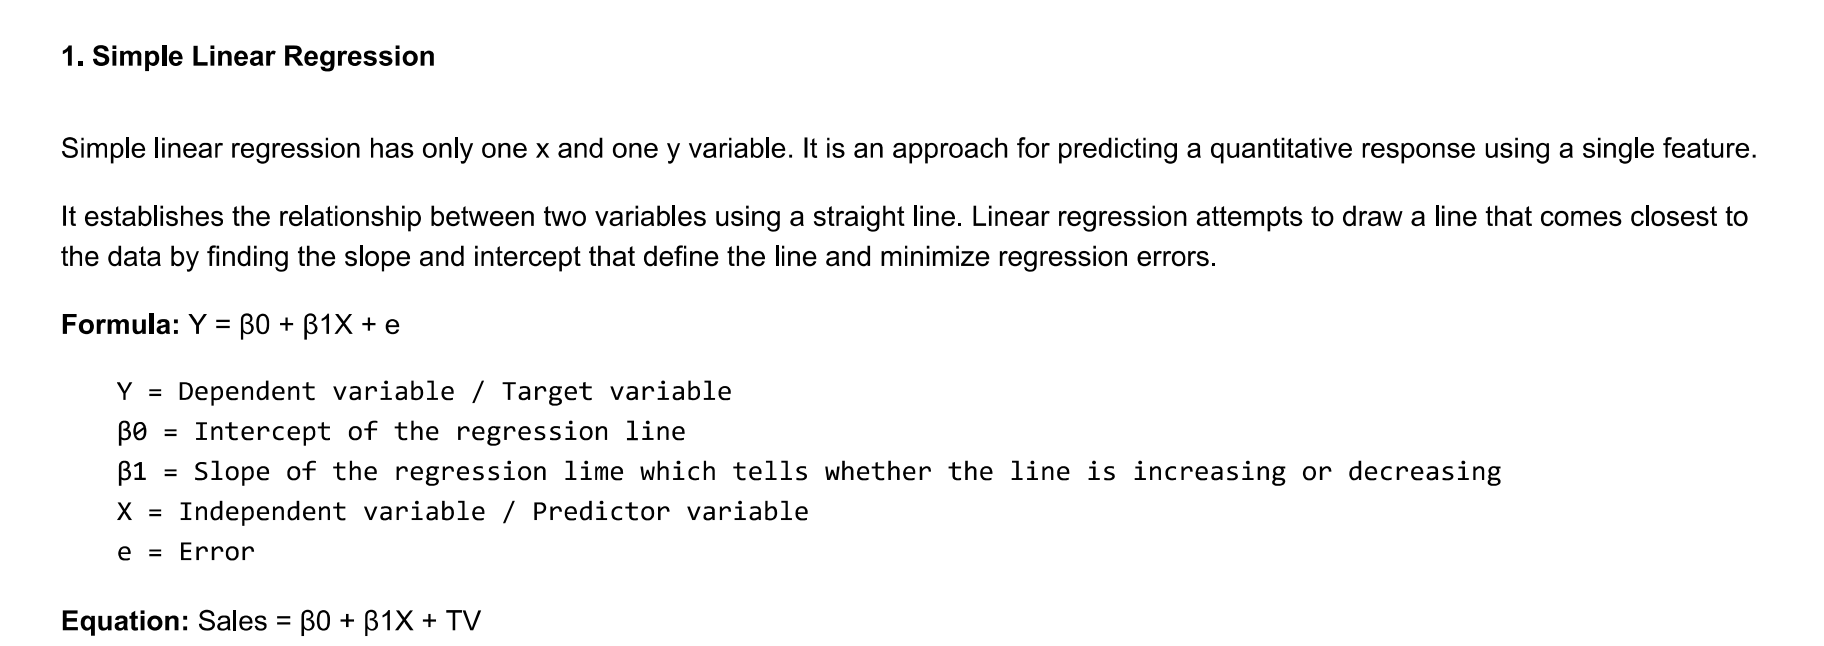

Importing the Libraries

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

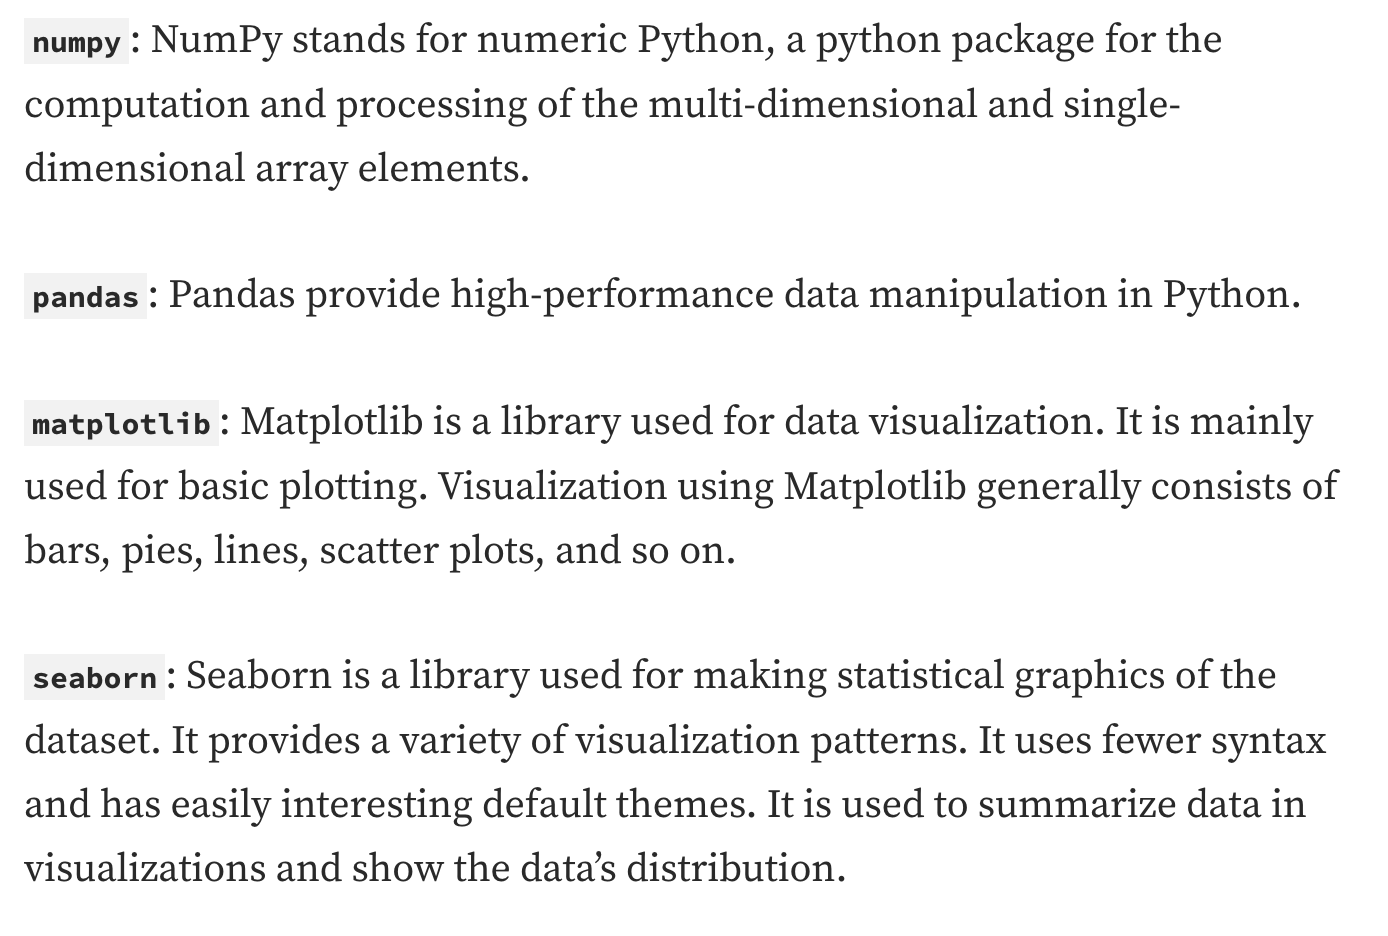

## Reading the Dataset

In [2]:
#Reading the dataset
dataset = pd.read_csv("advertising.csv")

The dataset is in the CSV (Comma-Separated Values) format. Hence, we use pd.read_csv()to read the dataset.

In [3]:
dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Since our problem involves only Sales and TV columns, we do not need radio and newspaper columns. Therefore, we can drop those columns.

In [4]:
#Dropping the unnecessary columns
dataset.drop(columns=['Radio', 'Newspaper'], inplace = True)
dataset.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9


# Equation: Sales = β0 + β1*TV + e

Setting the values for independent (X) variable and dependent (Y) variable

In [5]:
#Setting the value for X and Y
x = dataset[['TV']]
y = dataset['Sales']

Splitting the dataset into train and test set

In [6]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

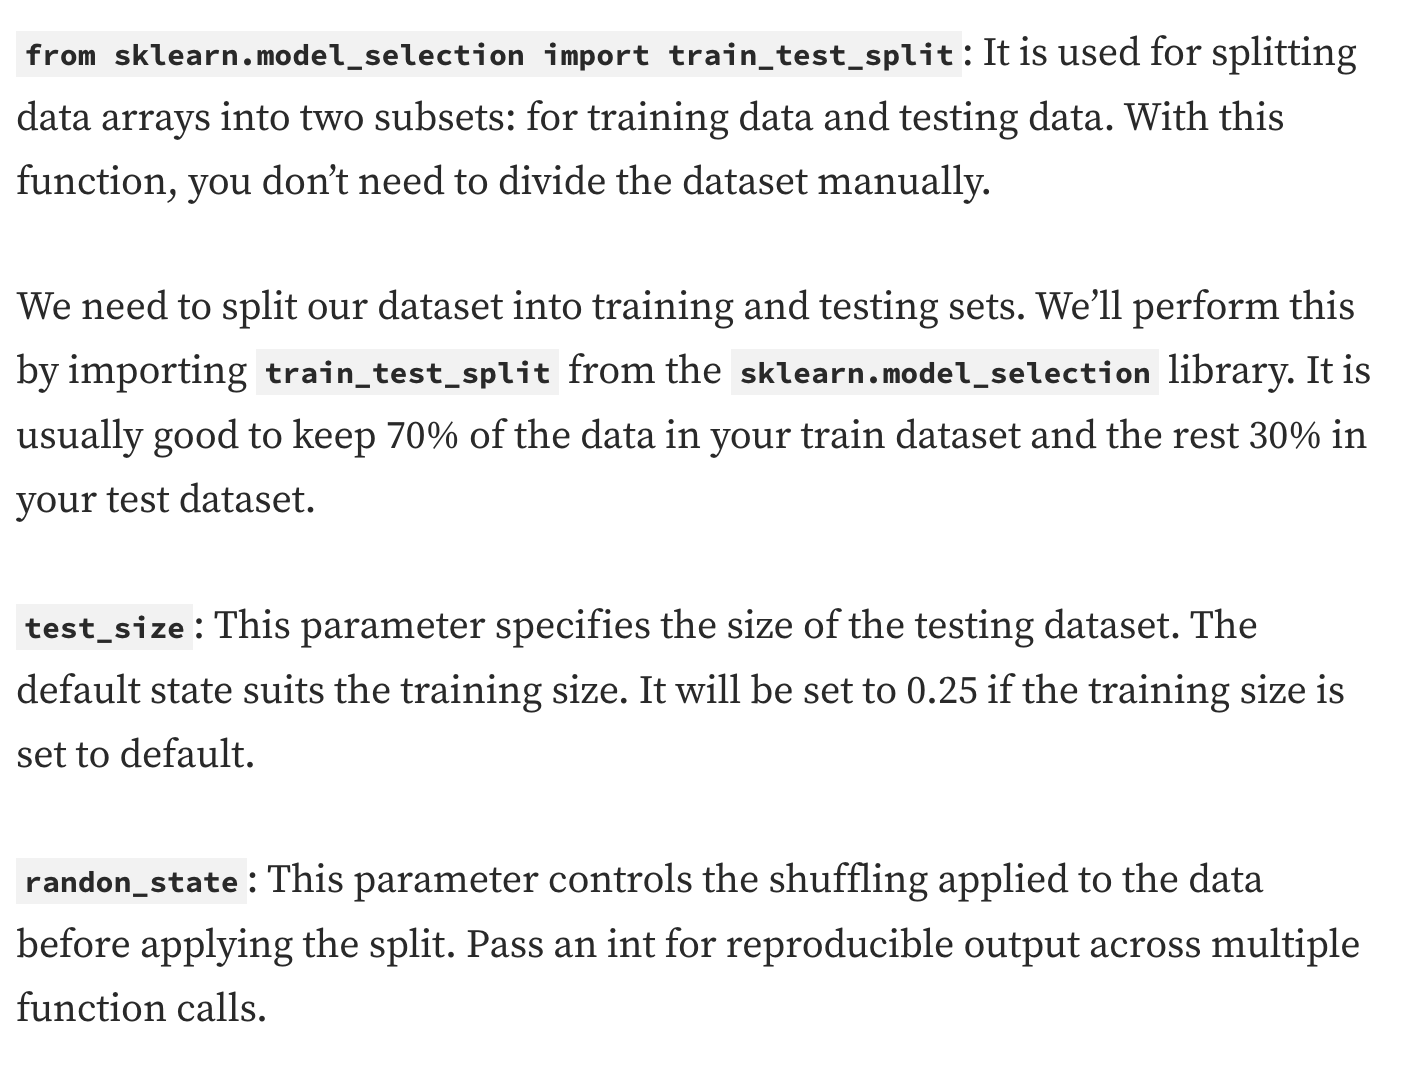

## Implementing the linear model

In [7]:
#Fitting the Linear Regression model
from sklearn.linear_model import LinearRegression
slr = LinearRegression()  
slr.fit(x_train, y_train)

LinearRegression()

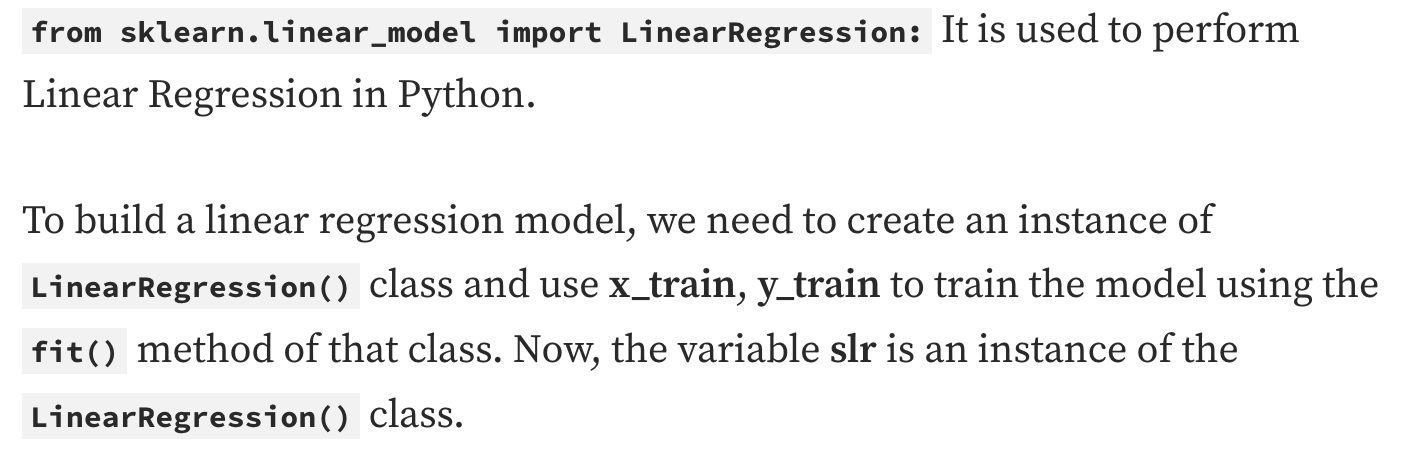

## Model Equation

In [8]:
#Intercept and Coefficient
print("Intercept: ", slr.intercept_)
print("Coefficient: ", slr.coef_)

Intercept:  6.94868320000136
Coefficient:  [0.05454575]


Regression Equation: Sales = 6.948 + 0.054 * TV

From the above-obtained equation for the Simple Linear Regression Model, we can see that the value of intercept is 6.948, which shows that if we keep the money spent on TV for advertisement as 0, the estimated average sales will be 6.948 and a single rupee increase in the money spent on TV for advertisement increases sales by 0.054.

## Prediction on the test set

In [9]:
#Prediction of test set
y_pred_slr= slr.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_slr))

Prediction for test set: [ 7.37414007 19.94148154 14.32326899 18.82329361 20.13239168 18.2287449
 14.54145201 17.72692398 18.75238413 18.77420243 13.34144544 19.46693349
 10.01415451 17.1923756  11.70507285 12.08689312 15.11418241 16.23237035
 15.8669138  13.1068987  18.65965635 14.00690363 17.60692332 16.60328147
 17.03419291 18.96511257 18.93783969 11.05597839 17.03419291 13.66326538
 10.6796127  10.71234015 13.5487193  17.22510305  9.67597085 13.52144643
 12.25053038 16.13418799 19.07965865 17.48692266 18.69783838 16.53237199
 15.92145955 18.86693021 13.5050827  11.84143724  7.87050642 20.51966653
 10.79961336  9.03233096 17.99419817 16.29237067 11.04506924 14.09963141
 18.44147334  9.3759692   7.88687015  8.34505447 17.72692398 11.62325422]


Once we have fitted (trained) the model, we can make predictions using the predict() function. We pass the values of x_test to this method and compare the predicted values called y_pred_slr with y_test values to check how accurate our predicted values are.



## Actual values and the predicted values

In [10]:
#Actual value and the predicted value
slr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_slr})
slr_diff.head()

,Actual value,Predicted value
126,6.6,7.374140
104,20.7,19.941482
99,17.2,14.323269
92,19.4,18.823294
111,21.8,20.132392


## Line of Best Fit

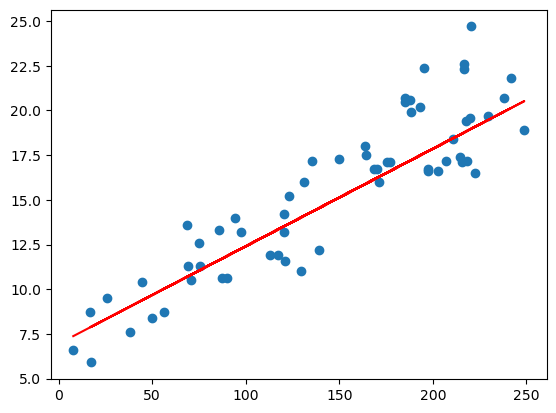

In [11]:
#Line of best fit
plt.scatter(x_test,y_test)
plt.plot(x_test, y_pred_slr, 'Red')
plt.show()

The above straight line is the best approximation of the given dataset.

## Evaluating the Model

In [12]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_slr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_slr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_slr))
print('R squared: {:.2f}'.format(slr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 81.10
Mean Absolute Error: 1.6480589869746525
Mean Square Error: 4.07755637182695
Root Mean Square Error: 2.0192960089662315


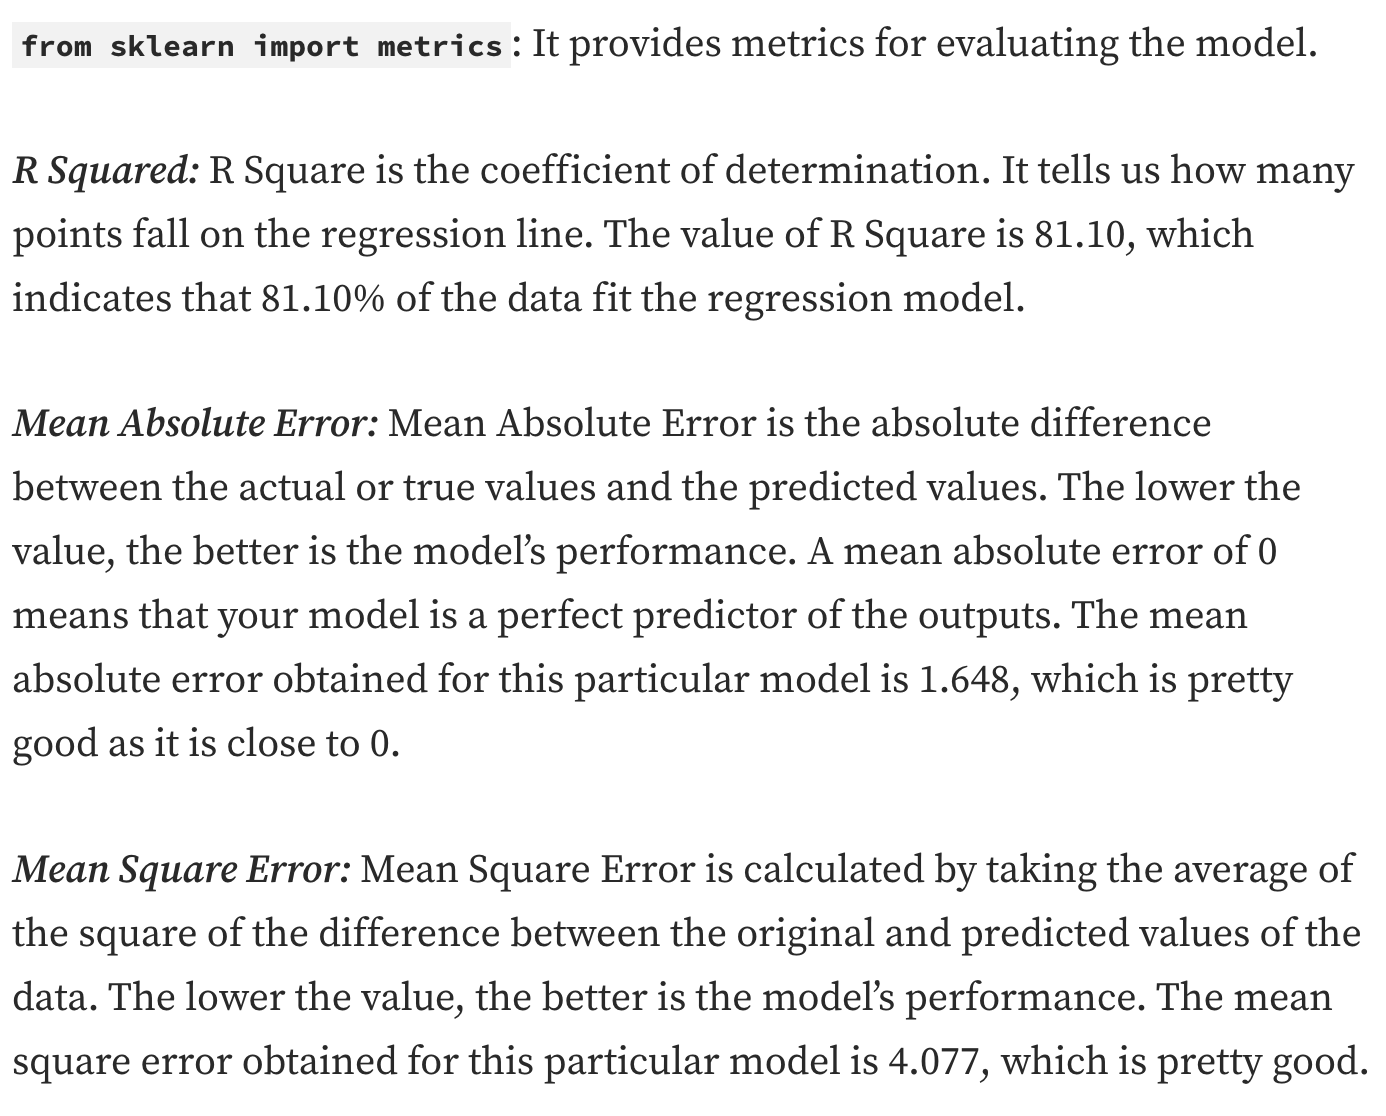

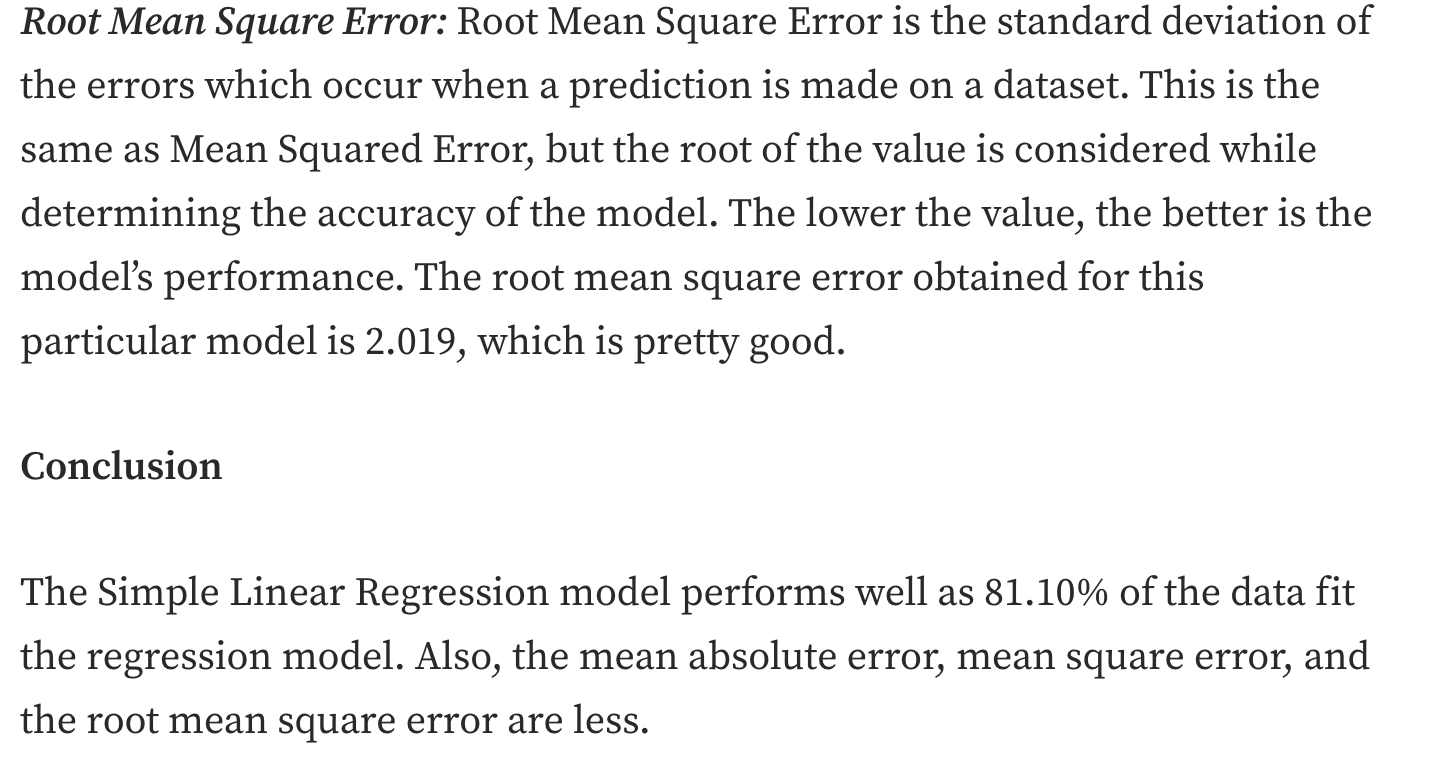

### Multiple Linear Regression

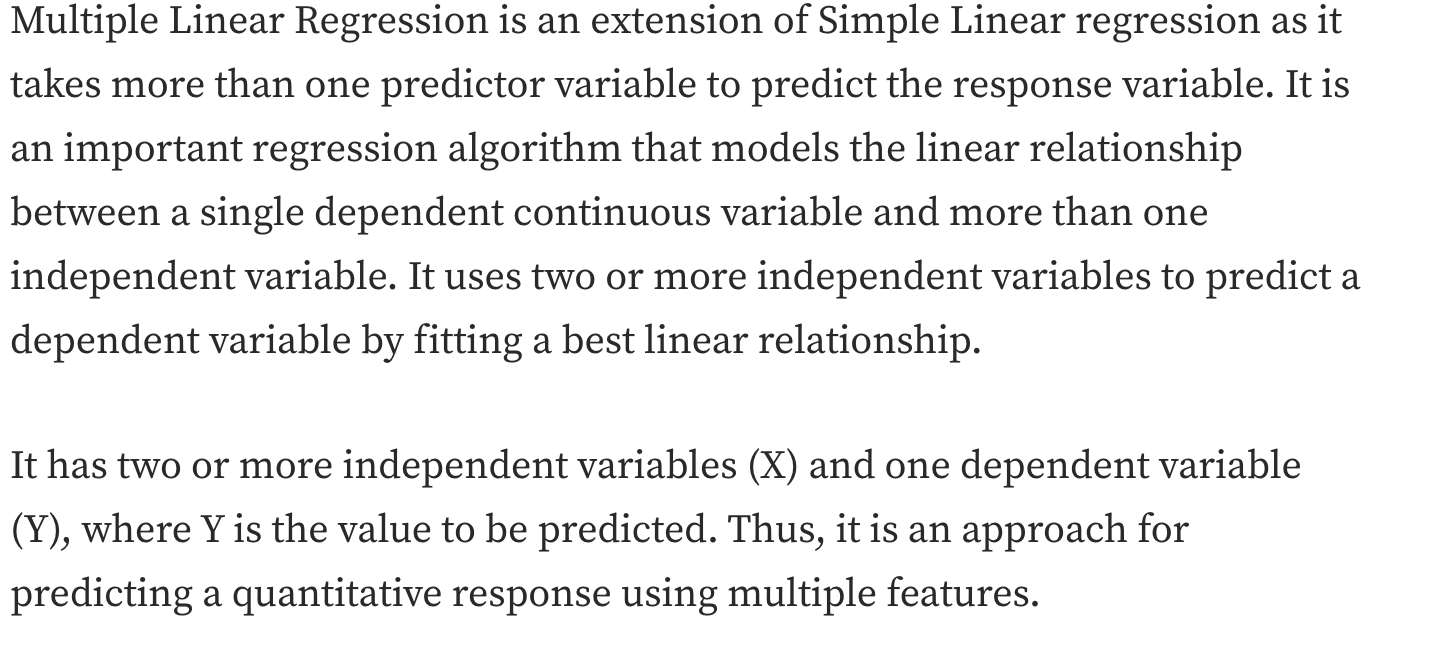

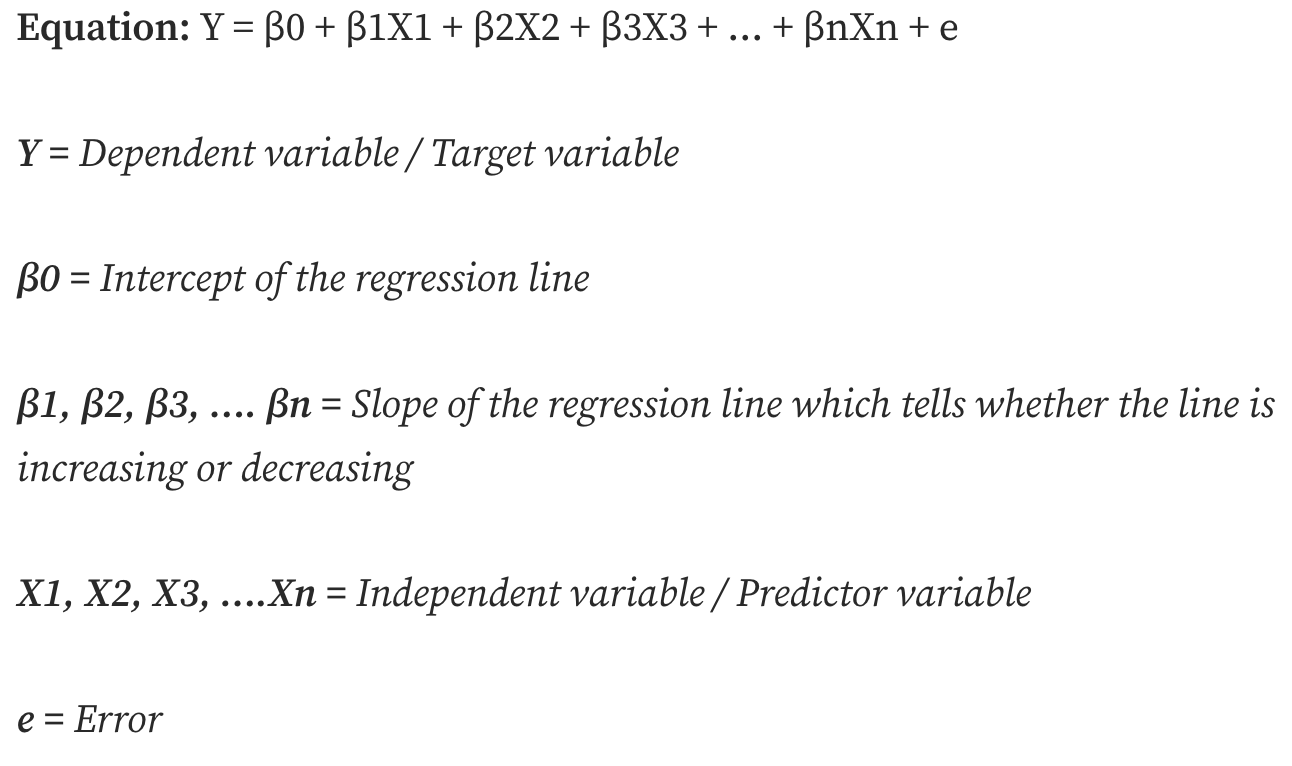

Example: Predicting sales based on the money spent on TV, Radio, and Newspaper for marketing. In this case, there are three independent variables, i.e., money spent on TV, Radio, and Newspaper for marketing, and one dependent variable, i.e., sales, that is the value to be predicted.

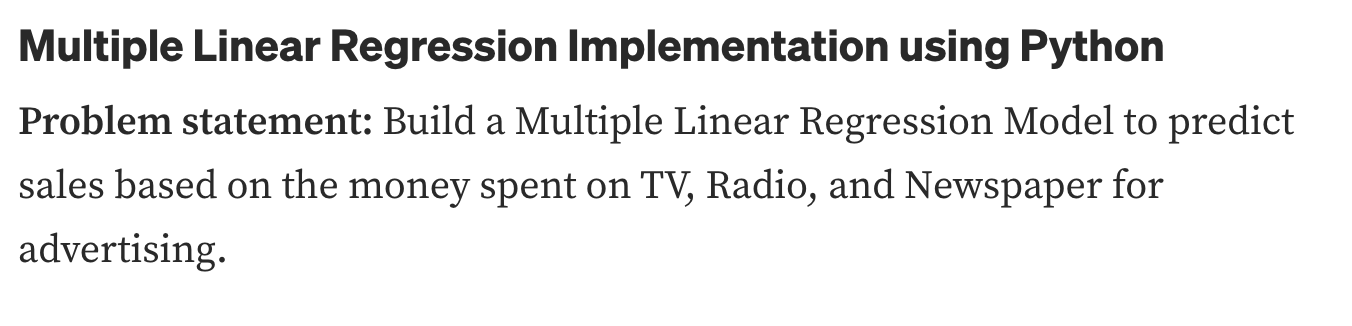

## Importing the Libraries

In [13]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

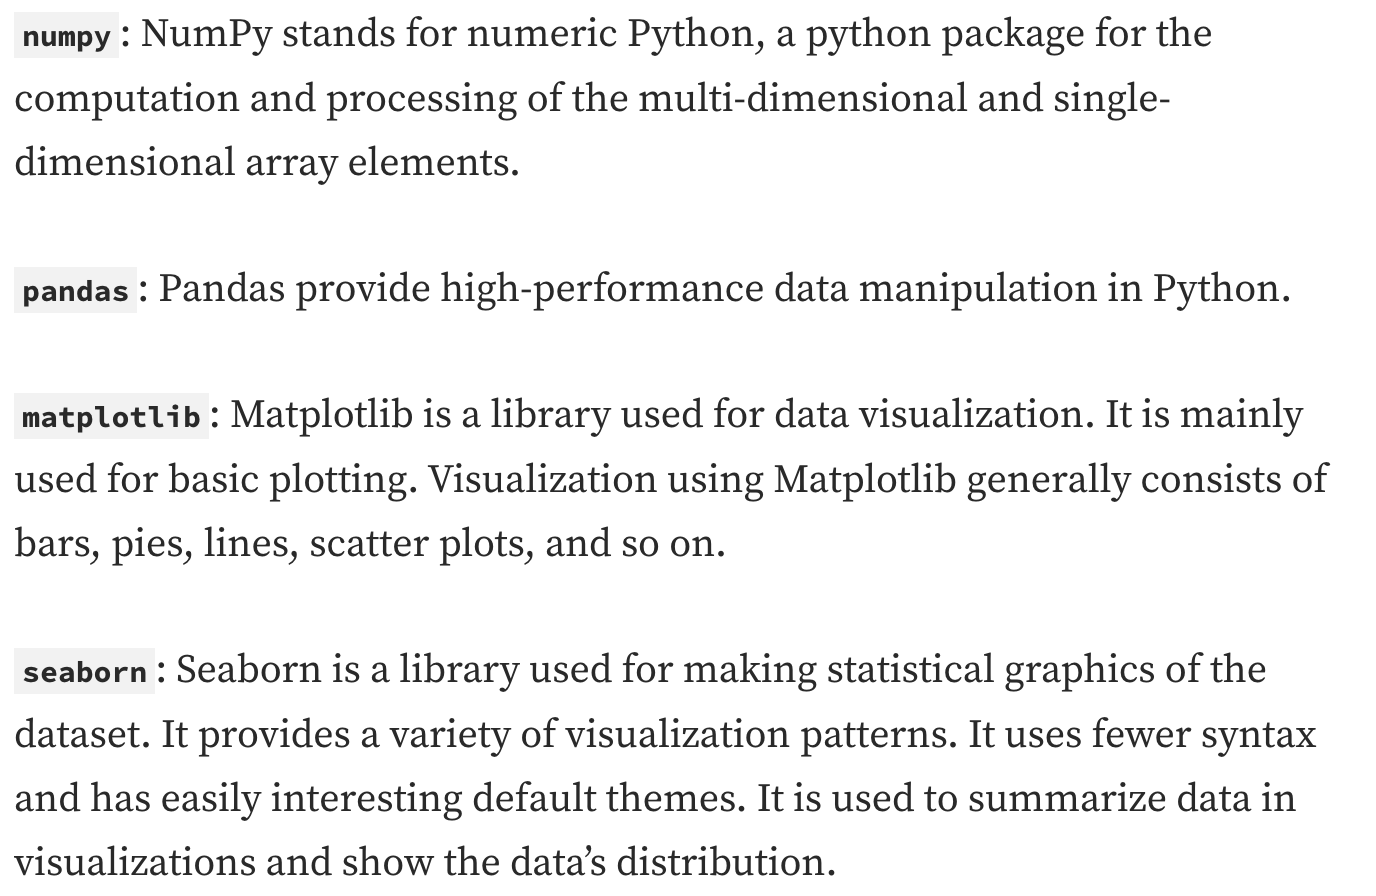

## Reading the Dataset

In [14]:
#Reading the dataset
dataset = pd.read_csv("advertising.csv")

The dataset is in the CSV (Comma-Separated Values) format. Hence, we use pd.read_csv()to read the dataset.

In [15]:
dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


### Equation: Sales = β0 + (β1 * TV) + (β2 * Radio) + (β3 * Newspaper) + e

### Setting the values for independent (X) variable and dependent (Y) variable

In [16]:
#Setting the value for X and Y
x = dataset[['TV', 'Radio', 'Newspaper']]
y = dataset['Sales']

### Splitting the dataset into train and test set

In [19]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

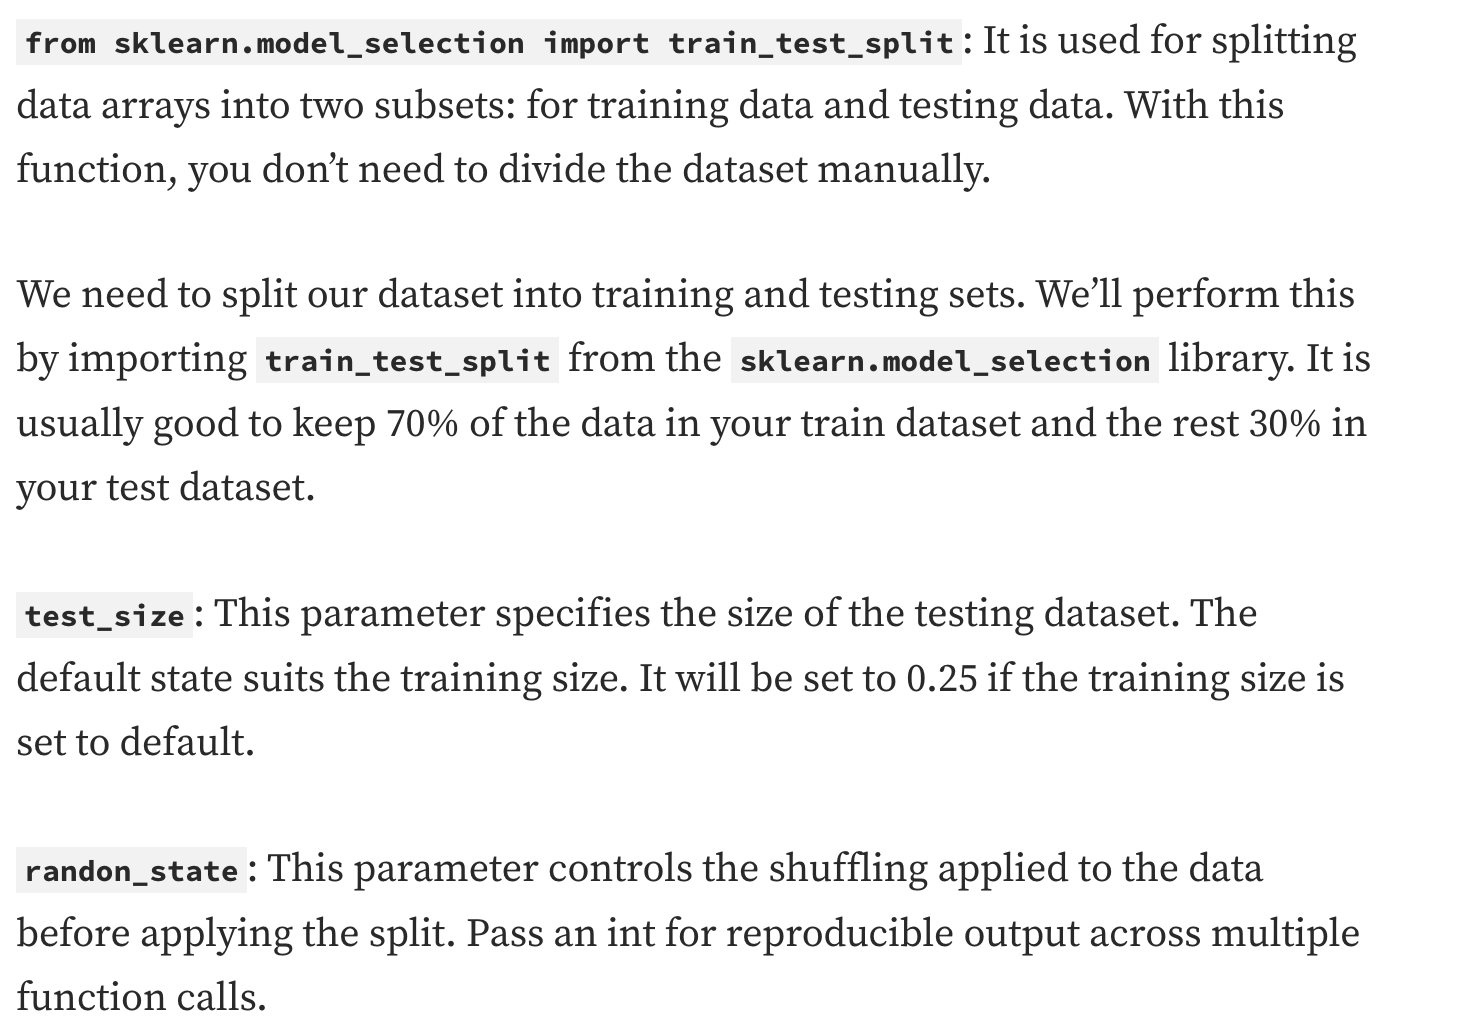

### Implementing the linear model

In [20]:
#Fitting the Multiple Linear Regression model
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

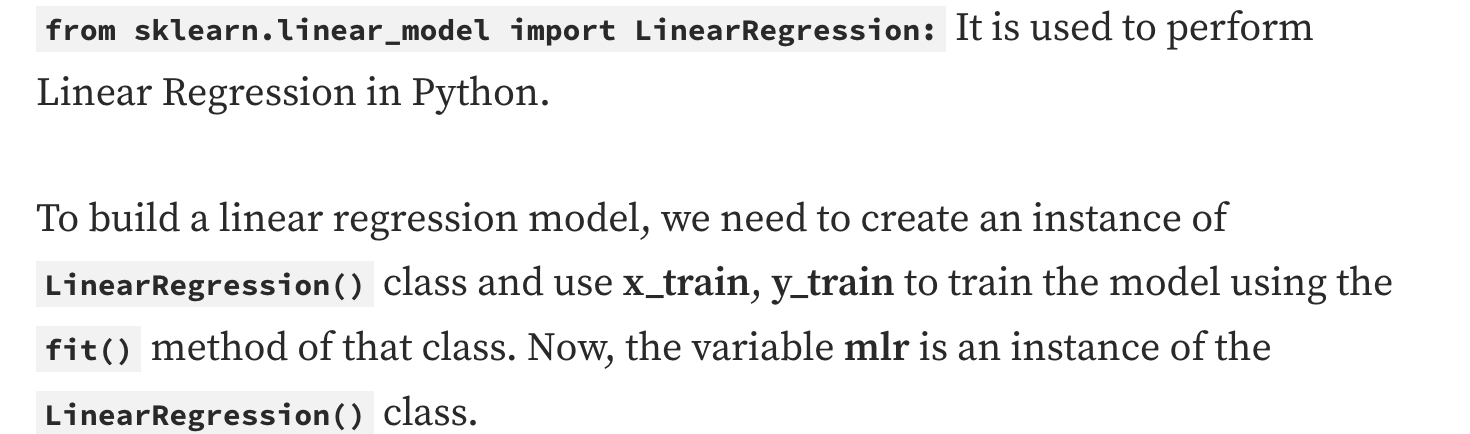

### Model Equation

In [21]:
#Intercept and Coefficient
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  4.334595861728436
Coefficients:


[('TV', 0.05382910866725004),
 ('Radio', 0.11001224388558055),
 ('Newspaper', 0.006289950146130319)]

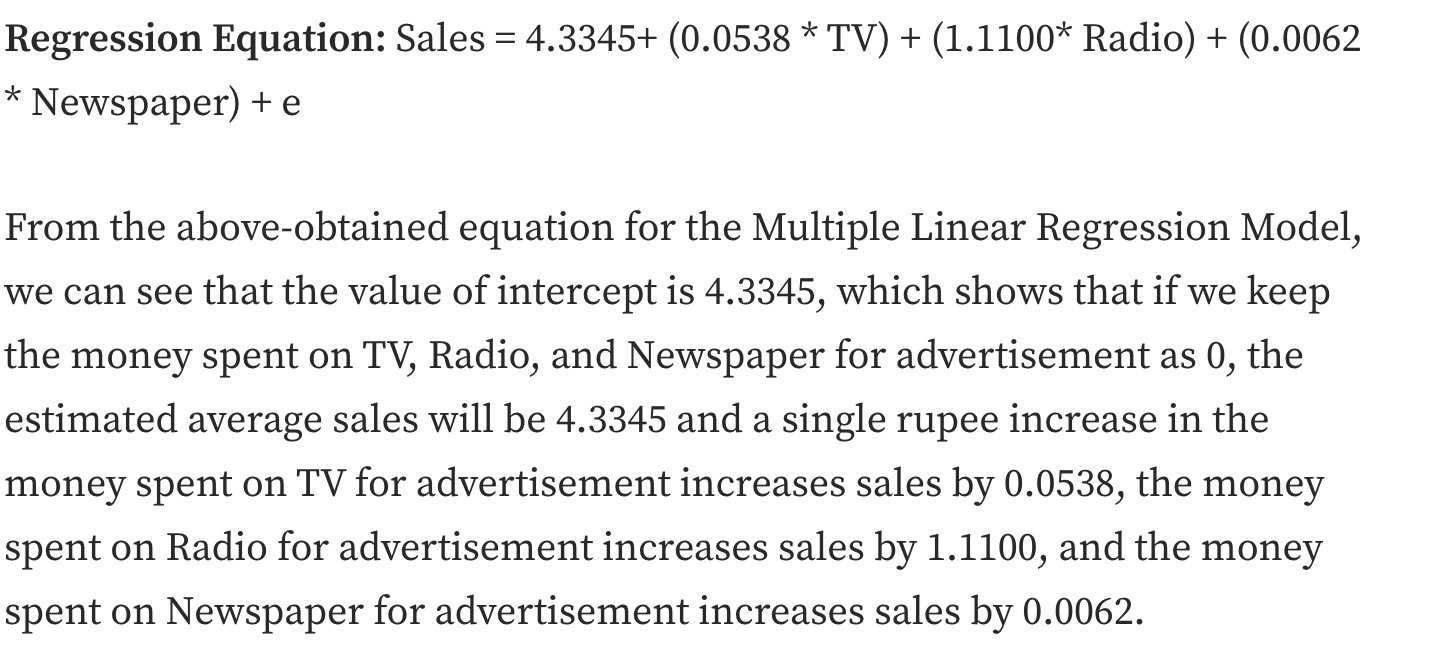

### Prediction on the test set

In [22]:
#Prediction of test set
y_pred_mlr= mlr.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [ 9.35221067 20.96344625 16.48851064 20.10971005 21.67148354 16.16054424
 13.5618056  15.39338129 20.81980757 21.00537077 12.29451311 20.70848608
  8.17367308 16.82471534 10.48954832  9.99530649 16.34698901 14.5758119
 17.23065133 12.56890735 18.55715915 12.12402775 20.43312609 17.78017811
 16.73623408 21.60387629 20.13532087 10.82559967 19.12782848 14.84537816
 13.13597397  9.07757918 12.07834143 16.62824427  8.41792841 14.0456697
  9.92050209 14.26101605 16.76262961 17.17185467 18.88797595 15.50165469
 15.78688377 16.86266686 13.03405813 10.47673934 10.6141644  20.85264977
 10.1517568   6.88471443 17.88702583 18.16013938 12.55907083 16.28189561
 18.98024679 11.33714913  5.91026916 10.06159509 17.62383031 13.19628335]


Once we have fitted (trained) the model, we can make predictions using the predict() function. We pass the values of x_test to this method and compare the predicted values called y_pred_mlr with y_test values to check how accurate our predicted values are.

### Actual values and the predicted values

In [23]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
slr_diff.head()

,Actual value,Predicted value
126,6.6,7.374140
104,20.7,19.941482
99,17.2,14.323269
92,19.4,18.823294
111,21.8,20.132392


### Evaluating the Model

In [24]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 90.11
Mean Absolute Error: 1.2278183566589413
Mean Square Error: 2.6360765623280673
Root Mean Square Error: 1.6235998775338913


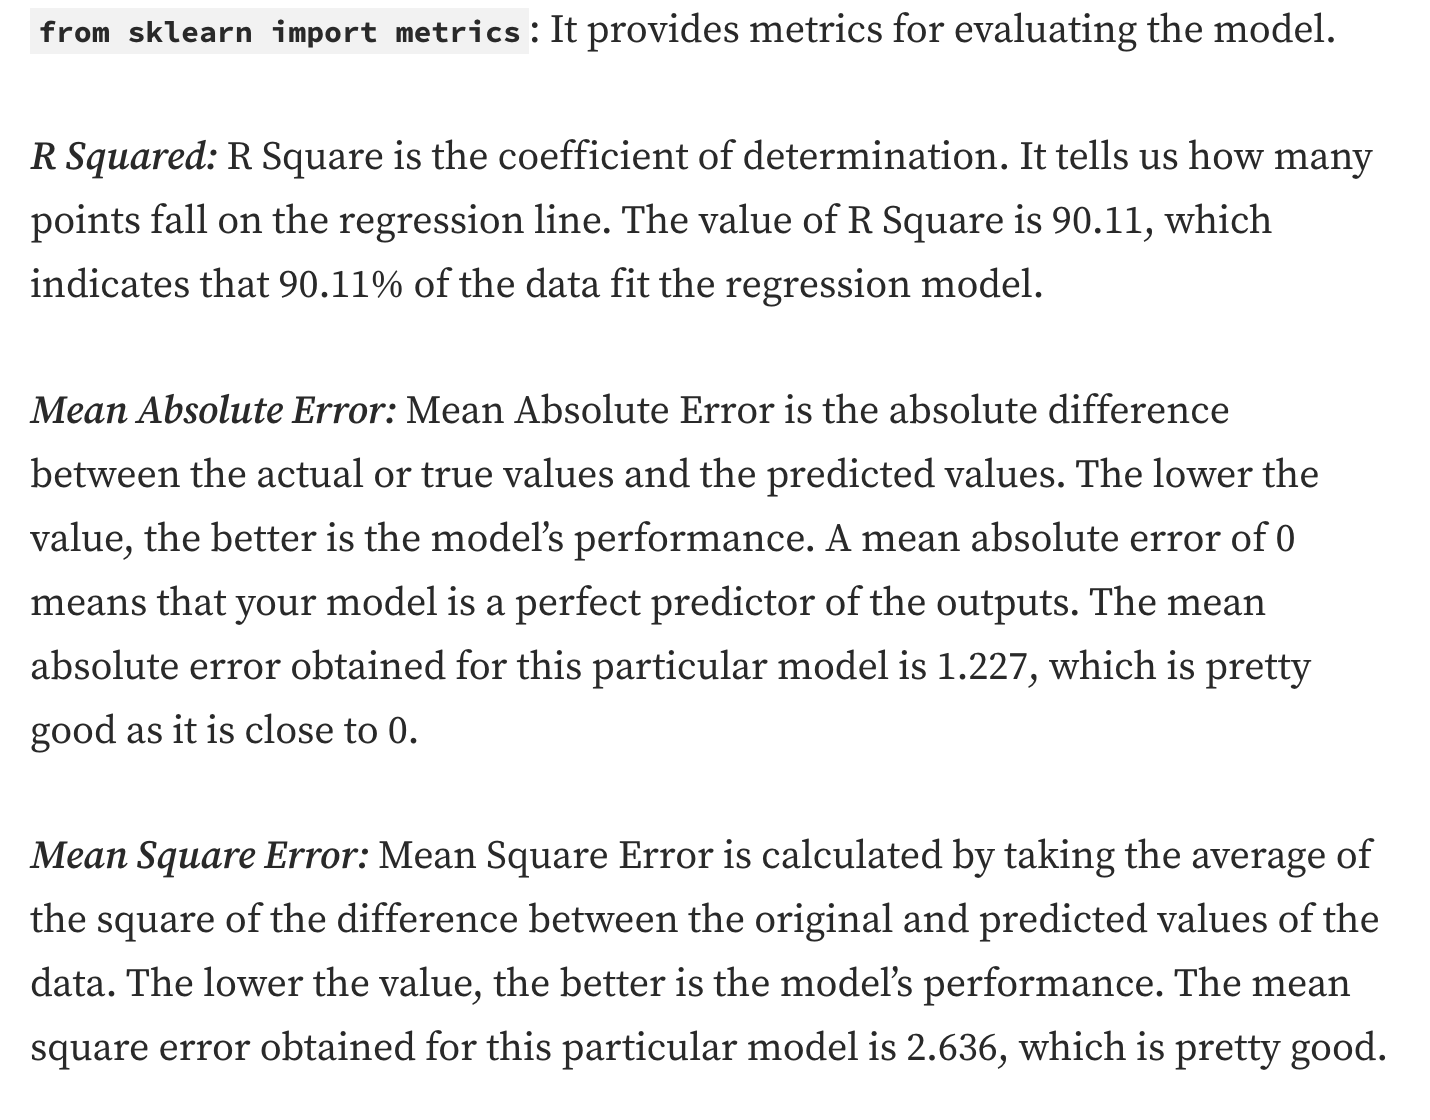

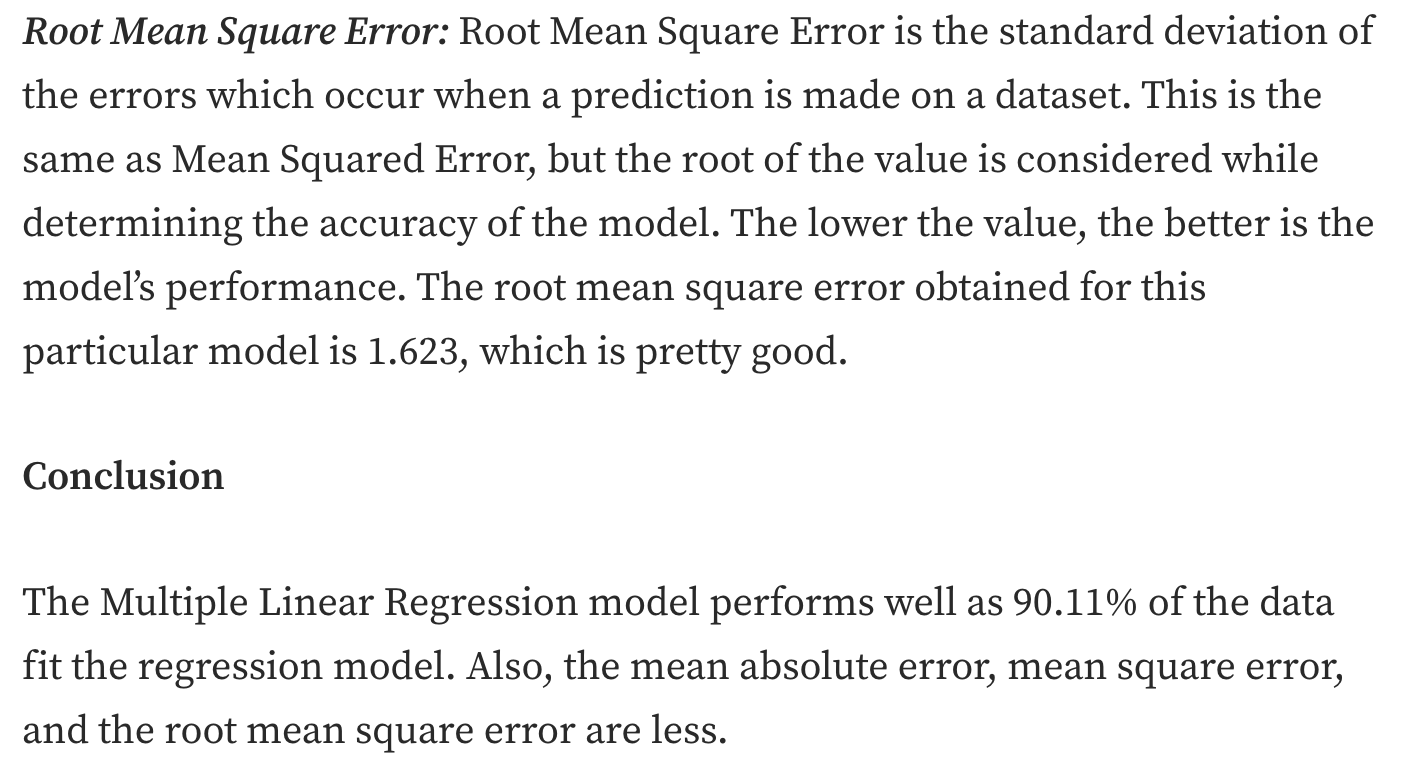